# **Laporan Proyek Machine Learning - Diana Mulhimah**

## **Book Recommendation Dataset**

## **Project Overview**
Seiring dengan berkembangnya teknologi informasi dan meningkatnya kebutuhan akan akses informasi yang cepat dan relevan, sistem rekomendasi memainkan peran penting dalam membantu pengguna menavigasi volume data yang sangat besar. Dalam konteks perpustakaan maupun aplikasi digital berbasis literasi, pengguna sering mengalami kesulitan dalam menemukan buku yang sesuai dengan preferensi mereka. Hal ini disebabkan oleh berbagai faktor, seperti keterbatasan waktu, minimnya informasi, serta banyaknya pilihan yang tersedia.
Untuk mengatasi permasalahan tersebut, sistem rekomendasi buku hadir sebagai solusi yang cerdas dengan tujuan menyederhanakan proses pencarian informasi dan meningkatkan pengalaman pengguna. Sistem ini bekerja dengan menganalisis perilaku pengguna, preferensi individu, serta karakteristik konten buku untuk memberikan rekomendasi yang relevan dan personal.
Salah satu pendekatan utama yang digunakan dalam sistem rekomendasi adalah Collaborative Filtering (CF), yang memanfaatkan interaksi dan penilaian dari banyak pengguna untuk menyarankan item yang disukai oleh pengguna dengan pola preferensi serupa. Metode ini terbagi menjadi dua, yaitu user-based dan item-based. CF terbukti efektif terutama saat tersedia data interaksi pengguna yang cukup banyak dan konsisten. Sebagai contoh, [^1] menerapkan algoritma Singular Value Decomposition (SVD) dalam CF, yang berhasil mereduksi sparsity dan meningkatkan kualitas prediksi rekomendasi buku.
Di sisi lain, pendekatan Content-Based Filtering (CBF) juga banyak digunakan, terutama dalam konteks perpustakaan. CBF bekerja dengan menganalisis atribut atau fitur dari item seperti judul, pengarang, dan genre untuk merekomendasikan item serupa. Penelitian oleh [^2] dan [^3] menunjukkan bahwa pendekatan ini dapat menghasilkan rekomendasi yang akurat berdasarkan deskripsi konten meskipun tanpa melibatkan data dari pengguna lain.
Proyek ini bertujuan untuk mengembangkan sistem rekomendasi buku dengan mengombinasikan pendekatan Collaborative Filtering dan Content-Based Filtering, berdasarkan efektivitas yang telah dibuktikan oleh beberapa studi sebelumnya. Dengan adanya sistem rekomendasi ini, diharapkan pengguna dapat memperoleh saran buku yang lebih personal dan relevan dengan preferensi mereka, serta mendukung digitalisasi layanan literasi yang efisien dan adaptif terhadap kebutuhan pengguna.

## **Business Understanding**
Pada tahap ini, dilakukan proses klarifikasi terhadap permasalahan yang dihadapi pengguna dalam menemukan buku yang relevan dengan preferensi mereka. Banyak pengguna kesulitan menemukan buku serupa setelah menyukai suatu buku karena keterbatasan informasi atau banyaknya pilihan yang tersedia. Selain itu, pengguna juga sering melewatkan buku-buku potensial yang belum pernah mereka baca karena tidak muncul dalam pencarian atau rekomendasi.

### Problem Statements
*	Bagaimana sistem dapat merekomendasikan buku yang mirip dengan buku yang disukai oleh pengguna berdasarkan kontennya?
* Bagaimana sistem dapat memberikan rekomendasi buku yang belum pernah dibaca oleh pengguna tetapi mungkin disukai, berdasarkan perilaku pengguna lain?

### Goals
* Menghasilkan rekomendasi buku berdasarkan fitur konten buku seperti judul dan penulis, sehingga pengguna mendapatkan saran buku yang mirip dengan preferensinya sebelumnya menggunakan pendekatan Content-Based filtering.
* Memberikan rekomendasi buku yang belum dibaca oleh pengguna namun disukai oleh pengguna lain dengan pola rating serupa, menggunakan pendekatan Collaborative Filtering.

### Solution statements
* Solution 1: Content-Based Filtering (CBF) Menganalisis metadata buku untuk merekomendasikan buku serupa dengan yang telah disukai atau dibaca oleh pengguna. Teknik yang digunakan yaitu TF-IDF vectorization dan Cosine similarity.
* Solution 2: Collaborative Filtering (CF) – Menganalisis interaksi pengguna terhadap buku (dalam bentuk data rating), dan menemukan pola kesamaan antar pengguna untuk merekomendasikan buku yang belum pernah dinilai oleh pengguna tersebut. Teknik yang digunakan evaluasi dengan metrik RMSE.


# **Data Understanding**
Pada proyek ini, kita menggunakan **Book Recommendation Dataset** yang tersedia secara publik melalui situs  yang bersumber dari [Kaggle](https://https://www.kaggle.com/). Dataset ini berisi informasi tentang buku, pengguna, serta rating yang diberikan oleh pengguna terhadap buku-buku tersebut. Dataset ini sering digunakan dalam tugas sistem rekomendasi karena kompleksitas dan keragaman datanya.
Link Dataset: [Kaggle - Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)

Dataset ini terdiri dari 3 file utama, yaitu:
1. `Books.csv` — Informasi metadata buku.
2. `Users.csv` — Informasi pengguna.
3. `Ratings.csv` — Nilai rating yang diberikan pengguna terhadap buku.

**Deskripsi Variabel**
<br/>**Books.csv**
Berisi metadata dari setiap buku:
* `ISBN`: Nomor unik untuk identifikasi buku.
* `Book-Title`: Judul buku.
* `Book-Author`: Nama penulis.
* `Year-Of-Publication`: Tahun terbit buku.
* `Publisher`: Nama penerbit buku.
* `Image-URL-S`: Tautan ke gambar sampul buku dalam ukuran kecil.
* `Image-URL-M`: Tautan ke gambar sampul buku dalam ukuran sedang.
* `Image-URL-L`: Tautan ke gambar sampul buku dalam ukuran besar.

**Users.csv**
Berisi informasi pengguna yang memberi rating:
* `User-ID`: ID unik pengguna.
* `Location`: Lokasi pengguna (format: kota, negara bagian, negara).
* `Age`: Umur pengguna (dapat berisi nilai kosong atau tidak valid).

**Ratings.csv**
Berisi informasi rating yang diberikan oleh pengguna terhadap buku:
* `User-ID`: ID pengguna yang memberi rating.
* `ISBN`: ISBN buku yang dinilai.
* `Book-Rating`: Rating yang diberikan, dalam skala 0–10

In [ ]:
https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset?select=Users.csv
https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset?select=Books.csv
https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset?select=Ratings.csv

# **Import Liblary**

In [ ]:
# Import library
import os
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# **Load Dataset**

Di tahap ini memuat dataset

In [ ]:
# Mengguunakan path yang disediakan oleh kagglehub untuk menemukan dataset
arashnic_book_recommendation_datase_path = kagglehub.dataset_download('arashnic/book-recommendation-dataset')

# Buat path lengkap ke setiap file CSV
users_csv_path = os.path.join(arashnic_book_recommendation_datase_path, 'Users.csv')
books_csv_path = os.path.join(arashnic_book_recommendation_datase_path, 'Books.csv')
ratings_csv_path = os.path.join(arashnic_book_recommendation_datase_path, 'Ratings.csv')

print('Data source import complete.')

100%|██████████| 24.3M/24.3M [00:00<00:00, 84.1MB/s]

Extracting files...


Data source import complete.


In [ ]:
# Baca dataset menggunakan path untuk setiap file
users = pd.read_csv(users_csv_path)
books = pd.read_csv(books_csv_path, low_memory=False)
ratings = pd.read_csv(ratings_csv_path)

print('Jumlah ID unik pengguna: ', len(users['User-ID'].unique()))
print('Jumlah buku unik: ', len(books['ISBN'].unique()))
print('Jumlah rating: ', len(ratings))

Jumlah ID unik pengguna:  278858
Jumlah buku unik:  271360
Jumlah rating:  1149780


# **Univariate Exploratory Data Analysis**

Melakukan eksplorasi awal untuk memahami struktur data, melihat distribusi data, dll.

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
print('Banyak data: ', len(users['User-ID'].unique()))
print('Umur Pengguna: ', users['Age'].unique())
print('Lokasi Pengguna: ', users['Location'].unique())

Banyak data:  278858
Umur Pengguna:  [ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210.  88. 199. 147. 168. 132. 159. 186. 152. 102. 116.
 200. 115. 226. 137. 207. 229. 138. 109. 105. 228. 183. 204.  98. 223.
 113. 208. 107. 157. 111. 146. 118. 220. 143. 140. 189. 127.]
Lokasi Pengguna:  ['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lo

In [ ]:
print('Banyak data Usia: ', len(users['Age'].unique()))
print('Lokasi Pengguna: ', users['Location'].unique())

Banyak data Usia:  166
Lokasi Pengguna:  ['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']


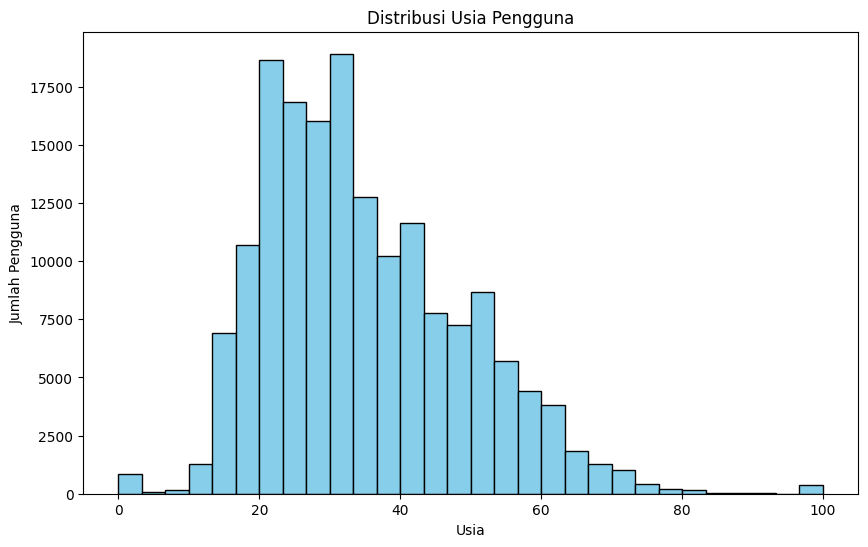

In [ ]:
# Plot distribusi usia
plt.figure(figsize=(10, 6))
users['Age'].dropna().astype(int).clip(0, 100).hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Usia Pengguna')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pengguna')
plt.grid(False)
plt.show()

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
print('Jumlah Tahun terbit buku: ', len(books['Year-Of-Publication'].unique()))
print('Penulis buku: ', books['Book-Author'].unique())

Jumlah Tahun terbit buku:  118
Penulis buku:  ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']


In [ ]:
print('Banyak Judul Buku: ', len(books['Book-Title'].unique()))
print('Judul Buku: ', books['Book-Title'].unique())

Banyak Judul Buku:  242135
Judul Buku:  ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]


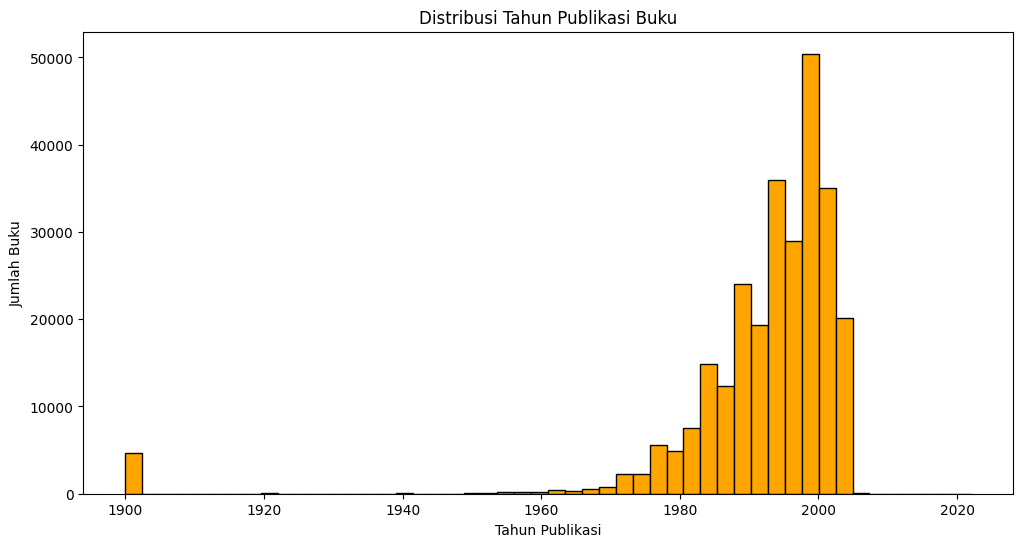

In [ ]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

plt.figure(figsize=(12, 6))
books['Year-Of-Publication'].dropna().astype(int).clip(1900, 2022).hist(bins=50, color='orange', edgecolor='black')
plt.title('Distribusi Tahun Publikasi Buku')
plt.xlabel('Tahun Publikasi')
plt.ylabel('Jumlah Buku')
plt.grid(False)
plt.show()

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print('Jumlah UserID: ', len(ratings['User-ID'].unique()))
print('Jumlah ISBN: ', len(ratings['ISBN'].unique()))
print('Jumlah Rating: ', len(ratings['Book-Rating'].unique()))
print('Jumlah data rating: ', len(ratings))

Jumlah UserID:  105283
Jumlah ISBN:  340556
Jumlah Rating:  11
Jumlah data rating:  1149780


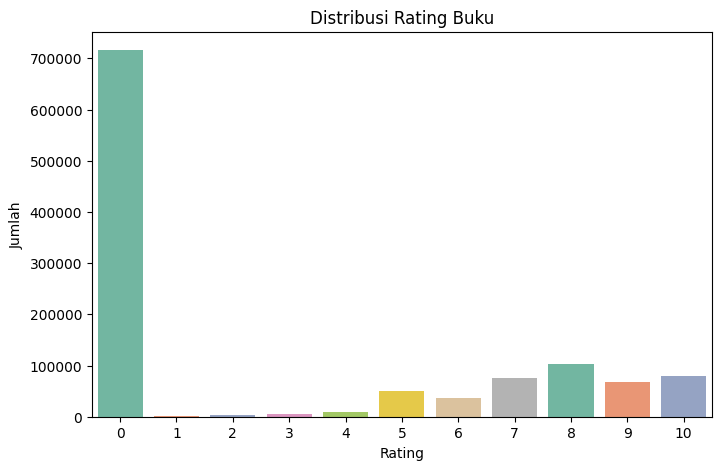

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=ratings, x='Book-Rating', hue='Book-Rating', palette='Set2', legend=False)
plt.title('Distribusi Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

# **Data Preprocessing**

In [ ]:
books = books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press


In [ ]:
# Pilih 10000 user unik secara acak
sample_users = users['User-ID'].dropna().unique()
sample_users = pd.Series(sample_users).sample(n=10000, random_state=42).values

# Filter ratings hanya untuk 10000 user terpilih
ratings_sample = ratings[ratings['User-ID'].isin(sample_users)]

# Pilih 10000 buku dari rating user yang sudah di-filter
sample_books = ratings_sample['ISBN'].dropna().unique()
sample_books = pd.Series(sample_books).sample(n=10000, random_state=42).values

# Filter rating hanya untuk buku terpilih
ratings_sample = ratings_sample[ratings_sample['ISBN'].isin(sample_books)]

# Batasi rating menjadi 10000 baris acak (jika lebih dari 5000)
if len(ratings_sample) > 10000:
    ratings_sample = ratings_sample.sample(n=10000, random_state=42)

# Filter buku sesuai buku yang dipilih dari ratings_sample (mengantisipasi filtering)
books_sample = books[books['ISBN'].isin(ratings_sample['ISBN'])]

# Filter users sesuai user yang ada di ratings_sample
users_sample = users[users['User-ID'].isin(ratings_sample['User-ID'])]

In [ ]:
ratings_sample.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [ ]:
ratings_sample.groupby('ISBN').sum()

,User-ID,Book-Rating
ISBN,,
0000000033220,126783,0
0001821040,156534,0
0001944711,110029,0
0002113570,110029,0
0002157950,157594,0
...,...,...
B00011SOYM,244708,0
I400042070,120672,9
I55192478I,99542,9


In [ ]:
all_ratings = ratings_sample
all_ratings

,User-ID,ISBN,Book-Rating
442548,105979,0679437460,0
469104,112026,059022865X,0
132698,30533,0553579525,0
736171,177569,0060095288,0
889342,214438,038056176X,7
...,...,...,...
486921,115783,0515128546,0
20392,3827,0688134017,0
808345,196160,0812574621,10
670307,162827,0786886781,0


In [ ]:
all_books = pd.merge(all_ratings, books[['ISBN','Book-Title','Book-Author']], on='ISBN', how='left')
all_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,105979,0679437460,0,Ordinary Life: Stories,ELIZABETH BERG
1,112026,059022865X,0,Mary Anne's Book (Baby-Sitters Club Portrait B...,Ann M. Martin
2,30533,0553579525,0,The Moor (Mary Russell Novels (Paperback)),LAURIE R. KING
3,177569,0060095288,0,Fire Lover,Joseph Wambaugh
4,214438,038056176X,7,Congo -Canc,Michael Crichton
...,...,...,...,...,...
9995,115783,0515128546,0,Tears of the Moon (Irish Trilogy),Nora Roberts
9996,3827,0688134017,0,"The Spellcoats (Dalemark Quartet, Book 3)",Diana Wynne Jones
9997,196160,0812574621,10,Animist,Eve Forward
9998,162827,0786886781,0,Profiles in Courage for Our Time,Caroline Kennedy


# **Data Preparation**

Tahap ini bertujuan untuk menyiapkan data agar dapat digunakan dalam membangun sistem rekomendasi, baik untuk pendekatan Content-Based Filtering maupun Collaborative Filtering. Teknik data preparation dilakukan secara sistematis untuk membersihkan, menyaring, dan memformat data ke dalam struktur yang sesuai untuk pemodelan.

In [ ]:
all_books.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,1040
Book-Author,1040


In [ ]:
# Membersihkan missing value dengan fungsi dropna()
all_books_clean = all_books.dropna()
all_books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,105979,0679437460,0,Ordinary Life: Stories,ELIZABETH BERG
1,112026,059022865X,0,Mary Anne's Book (Baby-Sitters Club Portrait B...,Ann M. Martin
2,30533,0553579525,0,The Moor (Mary Russell Novels (Paperback)),LAURIE R. KING
3,177569,0060095288,0,Fire Lover,Joseph Wambaugh
4,214438,038056176X,7,Congo -Canc,Michael Crichton
...,...,...,...,...,...
9995,115783,0515128546,0,Tears of the Moon (Irish Trilogy),Nora Roberts
9996,3827,0688134017,0,"The Spellcoats (Dalemark Quartet, Book 3)",Diana Wynne Jones
9997,196160,0812574621,10,Animist,Eve Forward
9998,162827,0786886781,0,Profiles in Courage for Our Time,Caroline Kennedy


In [ ]:
all_books_clean.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0


In [ ]:
preparation = all_books_clean
preparation.sort_values('ISBN')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
4435,110029,0001944711,0,Count Duckula: Vampire Vacation,Maureen Spurgeon
8024,110029,0002113570,0,In the shadow of man;,Jane Goodall
8058,157594,0002157950,0,Faultlines: Struggling for a Canadian vision,Jeffrey Simpson
4009,110029,0002166607,0,Travelling reserve,Ian Wooldridge
1999,28602,0002166828,8,Memoirs of a great Canadian detective: Inciden...,John Wilson Murray
...,...,...,...,...,...
4267,24662,9724119378,8,O Deus Das Pequenas Coisas,Roy
5535,162279,9748303292,4,Fruit of Karma,Sudassa Onkom
3610,126783,9838120634,0,Animal tales of Sabah: A cultural heritage of ...,P. S Shim
4131,150067,9997403754,0,The Secret of Santa Vittoria,Robert Crichton


In [ ]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,105979,0679437460,0,Ordinary Life: Stories,ELIZABETH BERG
1,112026,059022865X,0,Mary Anne's Book (Baby-Sitters Club Portrait B...,Ann M. Martin
2,30533,0553579525,0,The Moor (Mary Russell Novels (Paperback)),LAURIE R. KING
3,177569,0060095288,0,Fire Lover,Joseph Wambaugh
4,214438,038056176X,7,Congo -Canc,Michael Crichton
...,...,...,...,...,...
9994,45539,0679746692,9,Running in the Family (Vintage International),Michael Ondaatje
9996,3827,0688134017,0,"The Spellcoats (Dalemark Quartet, Book 3)",Diana Wynne Jones
9997,196160,0812574621,10,Animist,Eve Forward
9998,162827,0786886781,0,Profiles in Courage for Our Time,Caroline Kennedy


## **Data Preparation algoritma Content-based Filtering**

In [ ]:
# Mengonversi data series 'ISBN' menjadi dalam bentuk list
book_id = preparation['ISBN'].tolist()

# Mengonversi data series 'Book-Author' menjadi dalam bentuk list
book_author = preparation['Book-Author'].tolist()

# Mengonversi data series 'Book-Title' menjadi dalam bentuk list
book_title = preparation['Book-Title'].tolist()

print(len(book_id))
print(len(book_author))
print(len(book_title))

6702
6702
6702


In [ ]:
# Membuat dictionary untuk data ‘book_id’, ‘book_author’, dan ‘book_title’
book_new = pd.DataFrame({
    'id': book_id,
    'book_author': book_author,
    'book_title': book_title
})
book_new

,id,book_author,book_title
0,0679437460,ELIZABETH BERG,Ordinary Life: Stories
1,059022865X,Ann M. Martin,Mary Anne's Book (Baby-Sitters Club Portrait B...
2,0553579525,LAURIE R. KING,The Moor (Mary Russell Novels (Paperback))
3,0060095288,Joseph Wambaugh,Fire Lover
4,038056176X,Michael Crichton,Congo -Canc
...,...,...,...
6697,0679746692,Michael Ondaatje,Running in the Family (Vintage International)
6698,0688134017,Diana Wynne Jones,"The Spellcoats (Dalemark Quartet, Book 3)"
6699,0812574621,Eve Forward,Animist
6700,0786886781,Caroline Kennedy,Profiles in Courage for Our Time


In [ ]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data book_title
tf.fit(book_new['book_title'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['000', '001', '02', ..., 'â¼sse', 'â¼te', 'ãªtre'], dtype=object)

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(book_new['book_title'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(6702, 8842)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=book_new.book_author
).sample(8842, axis=1).sample(10, axis=0)

,moll,texto,im,photographer,carries,poseidon,hler,cream,jasper,shanghai,...,bd,envy,faithful,het,half,philosophen,terrorism,strokes,1938,breathing
book_author,,,,,,,,,,,,,,,,,,,,,
Olivia Goldsmith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MacInnes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Margret Rey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Maureen Richardson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
James A. Michener,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stephen L. Nelson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nancy Pickard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A. C. Bhaktivedanta Swami Prabhupada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beverly Cleary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Data Preparation algoritma Collaborative Filtering**

Collaborative Filtering didasarkan pada interaksi pengguna terhadap item. Sistem merekomendasikan buku yang disukai oleh pengguna lain yang memiliki preferensi serupa.

In [ ]:
# Membaca dataset

df = ratings_sample
df

,User-ID,ISBN,Book-Rating
442548,105979,0679437460,0
469104,112026,059022865X,0
132698,30533,0553579525,0
736171,177569,0060095288,0
889342,214438,038056176X,7
...,...,...,...
486921,115783,0515128546,0
20392,3827,0688134017,0
808345,196160,0812574621,10
670307,162827,0786886781,0


In [ ]:
# Mengubah User-ID menjadi list tanpa nilai yang sama
user_ids = df['User-ID'].unique().tolist()
print('list User-ID: ', user_ids)

# Melakukan encoding User-ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User-ID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User-ID: ', user_encoded_to_user)

list User-ID:  [105979, 112026, 30533, 177569, 214438, 201998, 159033, 157273, 176902, 111174, 209870, 261829, 275377, 155463, 110029, 50859, 173879, 148195, 210493, 59554, 161348, 53583, 275994, 28204, 236757, 92696, 1848, 43309, 145641, 126874, 32337, 167471, 34864, 116122, 145711, 263534, 101335, 203799, 138117, 204591, 275414, 26371, 20119, 100846, 223231, 107333, 14232, 83304, 170947, 139136, 252071, 49547, 101527, 225617, 153361, 195904, 16413, 146521, 13167, 207300, 191327, 273113, 242351, 98628, 51082, 9141, 26611, 23288, 86595, 112298, 134621, 105904, 170513, 118538, 146348, 248597, 234702, 76096, 236618, 246933, 96776, 126783, 102118, 270738, 3827, 70882, 109771, 71831, 152742, 266642, 182746, 207411, 120695, 51192, 127826, 31171, 117852, 72689, 257170, 172422, 50519, 170184, 98440, 149630, 75485, 205222, 134837, 186570, 13200, 196160, 267897, 48217, 109107, 182334, 38277, 238773, 225625, 208829, 244708, 126588, 176001, 104213, 207570, 162279, 30263, 156534, 242445, 27788, 61

In [ ]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_ids = df['ISBN'].unique().tolist()

# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

In [ ]:
# Mapping User-ID ke dataframe user
df['user'] = df['User-ID'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe book
df['book'] = df['ISBN'].map(book_to_book_encoded)

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah book
num_book = len(book_encoded_to_book)
print(num_book)

# Mengubah rating menjadi nilai float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['Book-Rating'])

# Nilai maksimal rating
max_rating = max(df['Book-Rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

1789
7659
Number of User: 1789, Number of Book: 7659, Min Rating: 0.0, Max Rating: 10.0


In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book
837074,202277,0767914767,7.0,262,5109
314129,75777,0743455967,8.0,139,3942
559062,134837,0753703815,0.0,106,1577
475075,113817,0091832160,0.0,160,3990
585118,141256,039589171X,0.0,931,3819
...,...,...,...,...,...
368368,88652,0151002681,8.0,164,4735
188763,41589,0812550536,9.0,134,4330
699785,170513,1593080077,6.0,72,4474
606641,146348,0878700544,0.0,74,817


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 262 5109]
 [ 139 3942]
 [ 106 1577]
 ...
 [  72 4474]
 [  74  817]
 [   0 5838]] [0.7 0.8 0.  ... 0.6 0.  0.5]


# **Modeling**

Sistem rekomendasi dalam proyek ini dikembangkan menggunakan dua pendekatan utama, yaitu Content-Based Filtering (CBF) dan Collaborative Filtering (CF). Tujuan dari model ini adalah untuk membantu pengguna menemukan buku yang sesuai dengan preferensi mereka—baik berdasarkan kemiripan konten maupun perilaku pengguna lain.

## **Model Development dengan Content Based Filtering**

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.17260303, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17260303, 1.        , ..., 0.        , 0.        ,
        0.1762059 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.1762059 , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama book_author
cosine_sim_df = pd.DataFrame(cosine_sim, index=book_new['book_author'], columns=book_new['book_author'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap book
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (6702, 6702)


book_author,JEAN-DOMINIQUE BAUBY,Stephen Crane,Dean Marney,PATRICIA RICE,Katherine Applegate
book_author,,,,,
Esther M. Friesner,0.000000,0.000000,0.000000,0.0,0.000000
Bill Richardson,0.000000,0.000000,0.000000,0.0,0.000000
Martin Mellett,0.000000,0.000000,0.000000,0.0,0.000000
Katherine Dunn,0.000000,0.000000,0.000000,0.0,0.000000
Laura Joffe Numeroff,0.023405,0.024809,0.000000,0.0,0.000000
Jacqueline Carey,0.000000,0.000000,0.000000,0.0,0.000000
George Eliot,0.056898,0.030156,0.029471,0.0,0.033206
John Mortimer,0.033343,0.017671,0.017270,0.0,0.019459
Jack London,0.024832,0.191229,0.000000,0.0,0.028984


In [ ]:
def book_recommendations(nama_author, similarity_data=cosine_sim_df, items=book_new[['book_author', 'book_title']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_author].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_author agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_author, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
book_new[book_new.book_author.eq('Thomas Robbins')]

,id,book_author,book_title
56,0553205803,Thomas Robbins,Even Cowgirls Get the Blues


In [ ]:
# Mendapatkan rekomendasi buku yang mirip dengan
book_recommendations('Thomas Robbins')

,book_author,book_title
0,Elmore Leonard,Tishomingo Blues
1,Elmore Leonard,Bandits
2,Elmore Leonard,Out of Sight
3,Elmore Leonard,Gold Coast
4,Elmore Leonard,Cuba Libre


## **Model Development dengan Collaborative Filtering**

In [ ]:
import tensorflow as tf
from tensorflow import keras

class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.6838 - root_mean_squared_error: 0.4386 - val_loss: 0.6548 - val_root_mean_squared_error: 0.4204
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.5876 - root_mean_squared_error: 0.3809 - val_loss: 0.6301 - val_root_mean_squared_error: 0.4058
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.5357 - root_mean_squared_error: 0.3537 - val_loss: 0.6252 - val_root_mean_squared_error: 0.4029
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.5207 - root_mean_squared_error: 0.3430 - val_loss: 0.6144 - val_root_mean_squared_error: 0.3967
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.5128 - root_mean_squared_error: 0.3383 - val_loss: 0.6075 - val_root_mean_squared_error: 0.3928
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.4863 - root_mean_squared_error: 0.3253 - val_loss: 0.6002 - val_root_mean_squared_error: 0.3887
Epoch 7/100
1000/1000 ━━━━━━━━━

In [ ]:
book_df = book_new
df = ratings_sample

# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
book_visited_by_user = df[df['User-ID'] == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
book_not_visited = book_new[~book_new['id'].isin(book_visited_by_user.ISBN.values)]['id']
book_not_visited = list(
    set(book_not_visited)
    .intersection(set(book_to_book_encoded.keys()))
)

book_not_visited = [[book_to_book_encoded.get(x)] for x in book_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_visited), book_not_visited)
)

In [ ]:
ratings = model.predict(user_book_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)

top_book_user = (
    book_visited_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

book_df_rows = book_df[book_df['id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.book_author, ':', row.book_title)

print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)

recommended_book = book_df[book_df['id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.book_author, ':', row.book_title)

202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for users: 157273
Book with high ratings from user
--------------------------------
Wallace Earle Stegner : Crossing to Safety
Jeffrey Eugenides : Middlesex: A Novel
Rick Klaw : Geek Confidential : Echoes from the 21st Century
Andre Norton : Catfantastic III (Daw Book Collectors)
Tara K. Harper : Shadow Leader
--------------------------------
Top 10 book recommendation
--------------------------------
James Patterson : The Beach House
Stephen King : The Tommyknockers
Bill Bryson : The Mother Tongue
Matt Groening : Work Is Hell
Jack Finney : FROM TIME TO TIME
Bradley Trevor Greive : The Blue Day Book
Alan Paton : Cry, the Beloved Country (Oprah's Book Club)
Mary Roach : Stiff: The Curious Lives of Human Cadavers
Olivia Goldsmith : Flavor of the Month
Charlotte Bronte : Jane Eyre (Bantam Classics)


# **Evaluasi**

Tahap evaluasi bertujuan untuk mengukur seberapa baik sistem rekomendasi yang dibangun dalam memberikan rekomendasi yang relevan kepada pengguna.

## **Content-Based Filtering -> Precision**

Dalam proyek ini, evaluasi difokuskan pada **Content-Based Filtering (CBF)** dengan menggunakan metrik **Precision\@K**.

In [64]:
# Top-5 hasil rekomendasi dari fungsi Content-Based
recommended = book_recommendations('Thomas Robbins')

# Daftar penulis atau judul yang dianggap relevan
relevant_authors = ['Elmore Leonard']
relevant_titles = ['Bandits', 'Tishomingo Blues', 'Out of Sight', 'Cuba Libre', 'Gold Coast']

# Cek relevansi
recommended['is_relevant'] = recommended.apply(
    lambda x: (x['book_author'] in relevant_authors) or (x['book_title'] in relevant_titles),
    axis=1
)

# Hitung Precision@
total_recs = len(recommended)
relevant_recs = recommended['is_relevant'].sum()
precision = relevant_recs / total_recs if total_recs > 0 else 0

print(f"Precision@: {precision:.2f}")

Precision@: 1.00




## **Collaborative Filtering -> Metrik Root Mean Squared Error (RMSE)**

Dalam proyek ini, evaluasi pada **Collaborative Filtering (CF)** dengan menggunakan metrik **Root Mean Squared Error (RMSE)**.

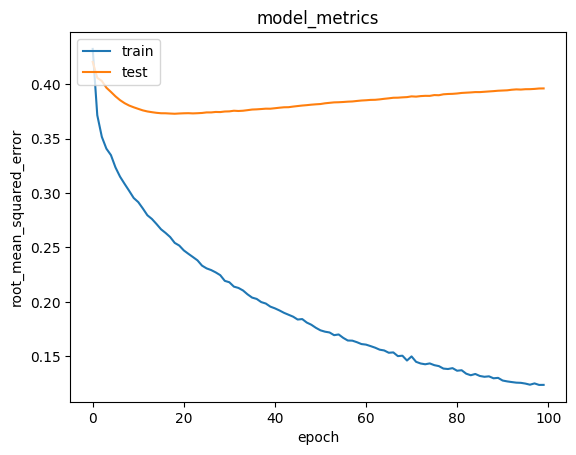

Final RMSE (Train): 0.1237
Final RMSE (Validation): 0.3960


In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

final_rmse_train = history.history['root_mean_squared_error'][-1]
final_rmse_val = history.history['val_root_mean_squared_error'][-1]

print(f"Final RMSE (Train): {final_rmse_train:.4f}")
print(f"Final RMSE (Validation): {final_rmse_val:.4f}")